<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/CNN%26RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
# MNIST 데이터셋 다운로드 및 변환
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.21MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
len(mnist_data[0]) # 숫자이미지 & 정답

2

In [ ]:
len(mnist_data[0][0][0][0]) # 즉 28 x 28임. 아래에 길게 있는 저 숫자하나가 하나의 픽셀을 의미 ( 0 ~ 1)

28

In [ ]:
mnist_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
mnist_data[0][1]

5

# 데이터셋 분할

In [ ]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(mnist_data,test_size=0.2)

In [ ]:
len(train)

48000

# 데이터로더에 올리기

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, (inputs, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx+1}")
    print("Inputs shape:", inputs.shape)
    print("Labels shape:", labels.shape)
    break  # 첫 번째 배치만 출력하고 루프 종료

Batch 1
Inputs shape: torch.Size([32, 1, 28, 28])
Labels shape: torch.Size([32])


# CNN 함수 만들기
  1. class 생성 with nn.Module
  2. 내부함수는 총 2가지, init, forward
  3. 반드시 super(CNN, self).__init__()로 부모클래스 초키화 메서드 호출해야함
  4. flatten 함수 써도 되고 x.view 써도 됨
    - x.view(x.size(0),-1) 에서 x.size(0)이 배치사이즈를 의미함

- CNN kernel -> activation -> pooling  ... -> fc
  - 만약 커널 계산시 안나눠떨어지면 버림임
  - square 기준 {(전체가로) - (kernel가로) + 2*(padding)} / (stride) + 1

In [ ]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # 28x28이니까 784 input? -> x
    # 그런게 아니라 input channel. 즉 흑백이면 1, rgb면 3
    self.k1 = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
    self.k2 = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=2,stride=2)
    self.act = torch.nn.ReLU()
    self.pool = torch.nn.MaxPool2d(kernel_size = 2,stride=2)
    self.fc = torch.nn.Linear(49,10)

  def forward(self,x) :
    x = self.k1(x)
    x = self.act(x)
    x = self.pool(x)
    x = self.k2(x)
    x = self.act(x)
    #x = self.pool(x)
    x = x.view(x.size(0),-1) # -1 == 자동으로 해줘~
    x = self.fc(x)
    return x

- parameter 조정

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.k1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)  # 필터 수 증가
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization
        self.k2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling 복구
        self.dropout = nn.Dropout(0.25)  # Dropout 추가
        self.fc = nn.Linear(32 * 7 * 7, 10)  # 입력 크기 조정: (32, 7, 7)

    def forward(self, x):
        x = self.k1(x)
        x = self.bn1(x)  # Batch Normalization
        x = nn.ReLU()(x)
        x = self.pool(x)

        x = self.k2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.pool(x)

        x = self.dropout(x)  # Dropout
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# 학습 루프
  - 아까 데이터로더 올렸던거 사용해야겠지? -> 데이터로더에서 배치사이즈 정하는거 떠올리고, 그러면 당연하게 배치 별로 뭔가를 한다~ 라고 생각 들어야지

  - 단계
    1. train 모드로 바꾸기 (이렇게 하면 nn.module에서 모델의 call method 호출될때 사용됨 ) & optimizer & loss_fn 설정
    2. iter by epoch
    3. iter by dataloader. 데이터 로더에서 input, output 꺼내기
    4. loss 구하기


   - loss.backward()
    - 손실함수의 값이 모든 weight에 대해 미분됨
    - 이 결과는 .grad에 저장됨
   - optimizer.step()
    - 계산된 grad를 통해 실제 가중치가 업데이트 되는 부분
   - optimizer.zero_grad()
    - 다음 iteration에서 사용할 그래디언트를 0으로 초기화
   - schedular.step()
    - 스케줄러는 에폭단위로 진행되므로, 데이터로더 단위의 iter에서 나와서 호출

In [ ]:
from tqdm import tqdm

model = CNN()
model.train()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # optimizer은 model의 파라미터를 보고있음.
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) # 얘는 optimizer를 보고있음

for epoch in tqdm(range(10)) :
  for input, label in train_loader:
    y = model(input)
    loss = loss_fn(y,label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  scheduler.step()

  0%|          | 0/10 [00:02<?, ?it/s]


KeyboardInterrupt: 

# 테스트 루프

  - 단계
    1. eval mode로 만들기
    2. torch.no_grad()

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for input, label in test_loader:
    y = model(input)
    y = torch.argmax(y)
    correct += (y == label).sum().item()  # 정답 비교
    total += label.size(0)

accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.73%


======================================================================================================

# RESNET 만들어보기 ( with customed CNN )
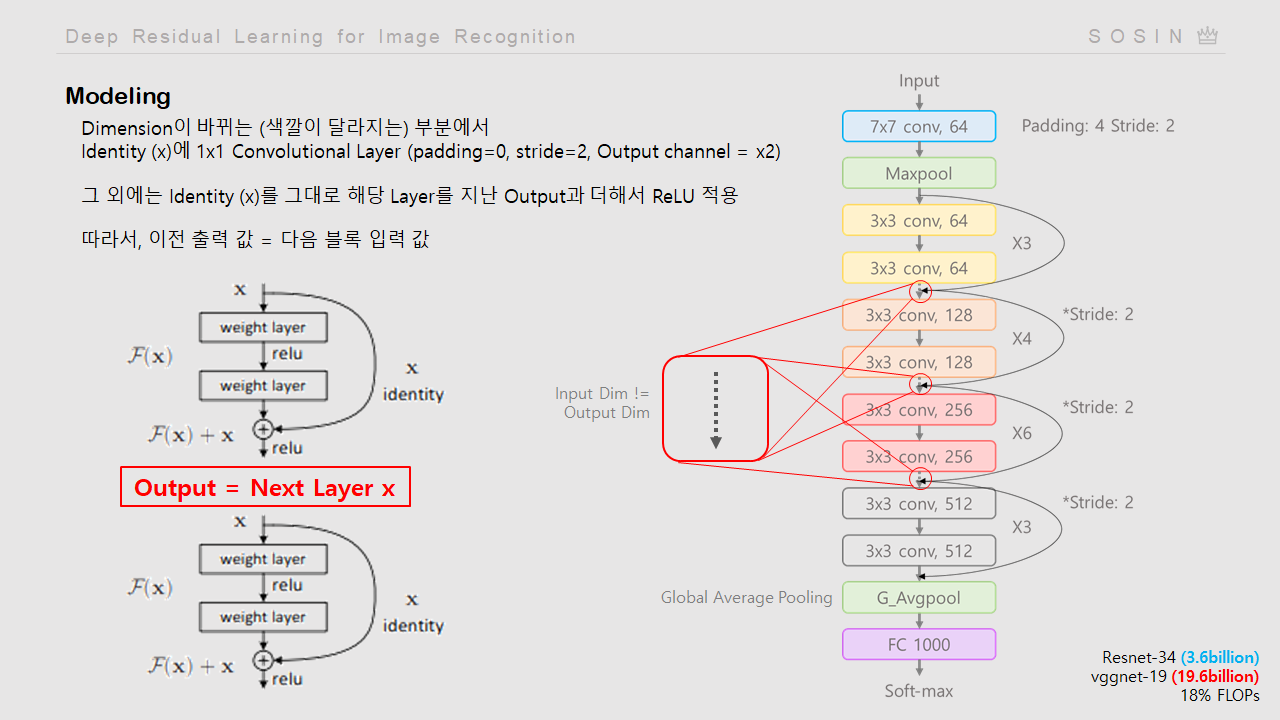

- 채널 수가 안바뀌는 부분은 그냥 쌩으로 더해주면 됨.
  - nn.sequential() 그냥 이렇게 하면 넣은대로 나옴
- 만약 채널 수가 바뀌는 부분이 있다면?
  - 1x1 conv를 통해서 채널을 맞춤

In [ ]:
import torch
import torch.nn.functional as F

def residual_block(x, in_channels, out_channels, stride=1):
    conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
    bn1 = nn.BatchNorm2d(out_channels)
    conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
    bn2 = nn.BatchNorm2d(out_channels)

    # Shortcut (크기가 다르면 맞추기)
    shortcut = nn.Sequential()
    if stride != 1 or in_channels != out_channels:
        shortcut = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
        )

    # Residual Connection
    identity = shortcut(x)
    x = F.relu(bn1(conv1(x)))
    x = bn2(conv2(x))
    x += identity
    x = F.relu(x)
    return x


In [ ]:
import torch.nn as nn
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()

        # 초기 Conv 레이어
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        # Feature Extraction에 Residual Block 사용
        self.layer1 = lambda x: residual_block(x, 64, 64, stride=1)   # Block 1
        self.layer2 = lambda x: residual_block(x, 64, 128, stride=2)  # Block 2
        self.layer3 = lambda x: residual_block(x, 128, 256, stride=2) # Block 3
        self.layer4 = lambda x: residual_block(x, 256, 512, stride=2) # Block 4

        # Fully Connected Layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))  # 초기 Conv

        # Residual Blocks 호출
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Classification
        x = self.avgpool(x)
        x = torch.flatten(x, 1)  # Flatten
        x = self.fc(x)
        return x


In [ ]:
model = ResNet(num_classes=10)
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
from tqdm import tqdm

model = ResNet()
model.train()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # optimizer은 model의 파라미터를 보고있음.
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) # 얘는 optimizer를 보고있음

for epoch in tqdm(range(10)) :
  for input, label in train_loader:
    y = model(input)
    loss = loss_fn(y,label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  scheduler.step()

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for input, label in test_loader:
    y = model(input)
    y = torch.argmax(y)
    correct += (y == label).sum().item()  # 정답 비교
    total += label.size(0)

accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")